In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score as acc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import BernoulliNB

# Pre-processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/4th sem/PR-ML[3-0-2] - cmn/major project/diabetes_data.csv',sep=';')
df=pd.read_csv('/content/drive/MyDrive/major_project/diabetes_data.csv',sep=';')
print(df)

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
0     40    Male         0           1                   0         1   
1     58    Male         0           0                   0         1   
2     41    Male         1           0                   0         1   
3     45    Male         0           0                   1         1   
4     60    Male         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39  Female         1           1                   1         0   
516   48  Female         1           1                   1         1   
517   58  Female         1           1                   1         1   
518   32  Female         0           0                   0         1   
519   42    Male         0           0                   0         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
0             0               0                0        1   

In [ ]:
df['gender'].replace(['Male', 'Female'],[0, 1], inplace=True)

In [ ]:
pd.unique(df['gender'])

array([0, 1])

In [ ]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

#Train Test

In [ ]:
# Choosing the features and the label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
encoder = MinMaxScaler()
X_train = encoder.fit_transform(X_train.values)
X_test = encoder.transform(X_test.values)


print(X_train)
print(X_test)

[[0.14864865 0.         0.         ... 0.         0.         0.        ]
 [0.41891892 0.         0.         ... 0.         0.         1.        ]
 [0.67567568 1.         1.         ... 1.         0.         0.        ]
 ...
 [0.72972973 0.         0.         ... 0.         1.         0.        ]
 [0.43243243 0.         1.         ... 0.         0.         0.        ]
 [0.64864865 0.         0.         ... 0.         0.         0.        ]]
[[0.68918919 0.         0.         ... 1.         1.         1.        ]
 [0.41891892 0.         1.         ... 1.         0.         0.        ]
 [0.36486486 1.         1.         ... 1.         0.         1.        ]
 ...
 [0.40540541 1.         1.         ... 1.         0.         0.        ]
 [0.43243243 1.         1.         ... 1.         1.         1.        ]
 [0.22972973 0.         0.         ... 0.         0.         0.        ]]


# Visualization

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.pairplot(df, hue='class', height=2)

# sns.scatterplot( x="polyuria",data=df,
#                 hue='class')
  
# # Placing Legend outside the Figure
# plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
# plt.show()


In [ ]:
type(X_train)

numpy.ndarray

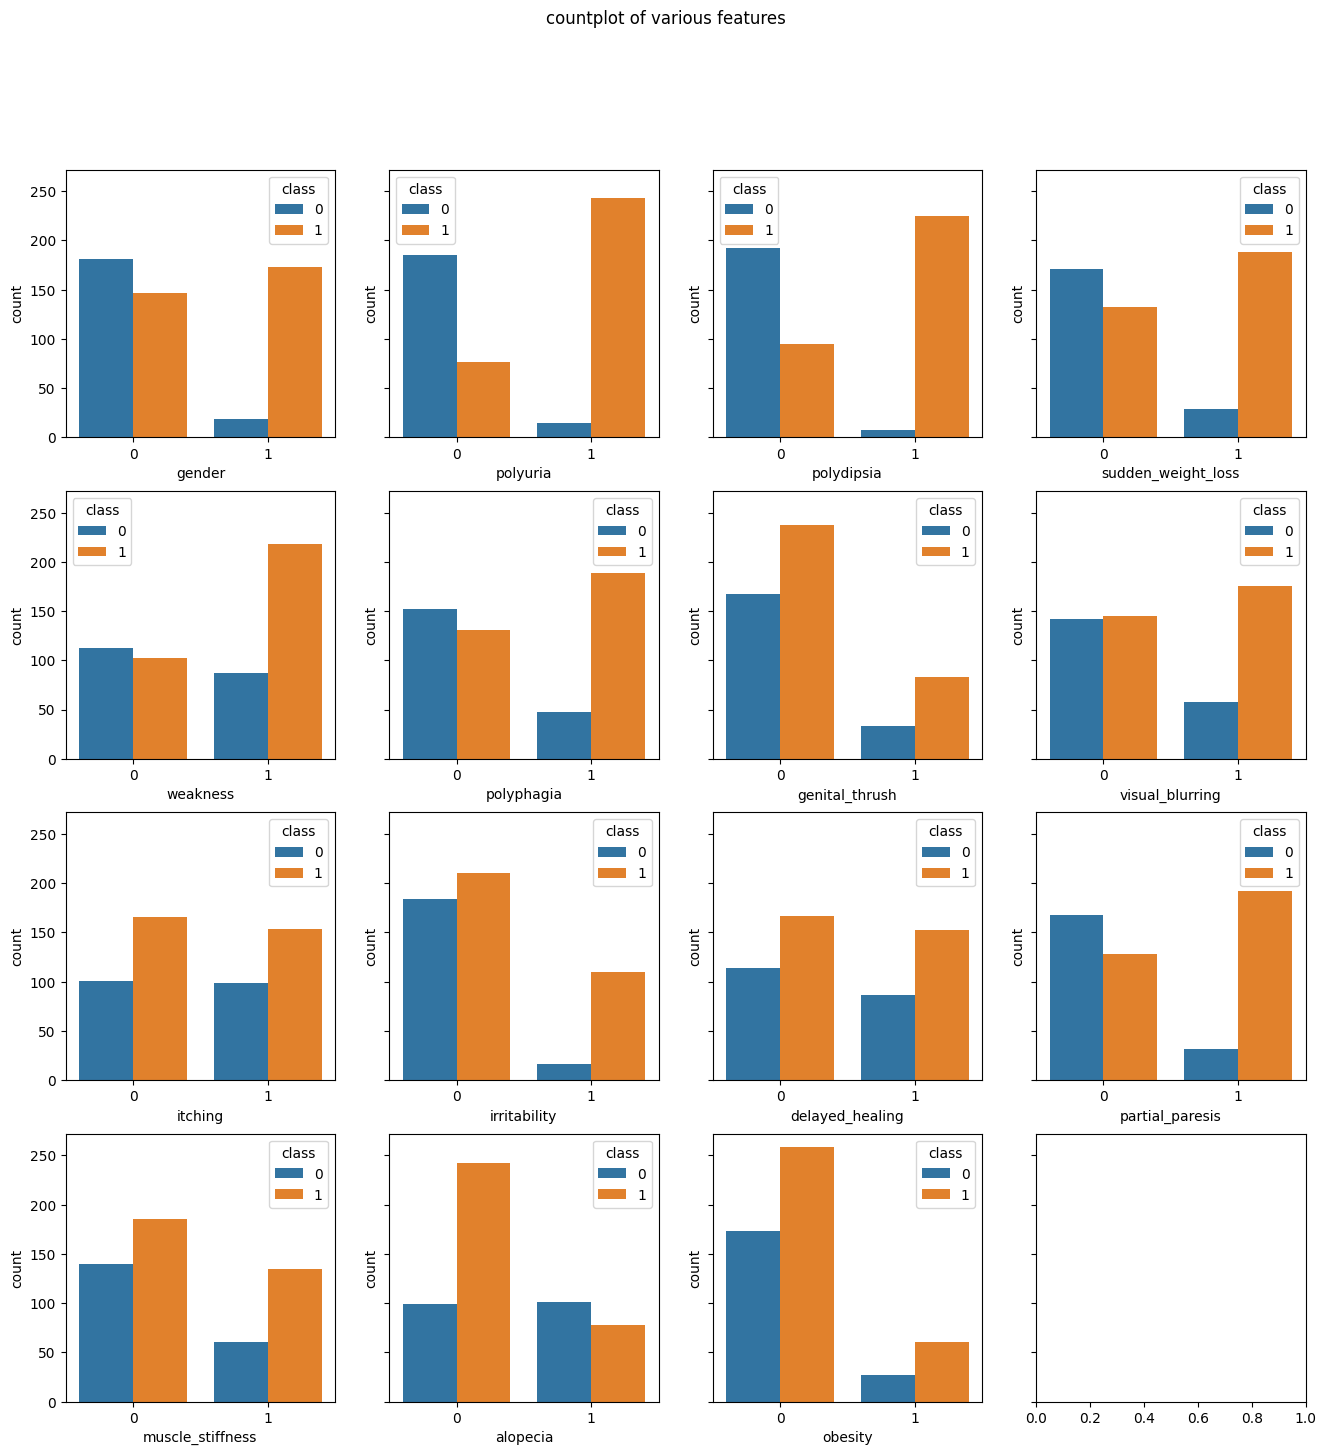

In [ ]:
fig, axes = plt.subplots(4,4,sharey=True,figsize=(16,16))
fig.suptitle('countplot of various features')
for i,name in enumerate(df.drop(columns=["class","age"])):
  sns.countplot(ax=axes[int(i/4)][i%4],data=df, x=name, hue="class")

<Axes: xlabel='age', ylabel='Count'>

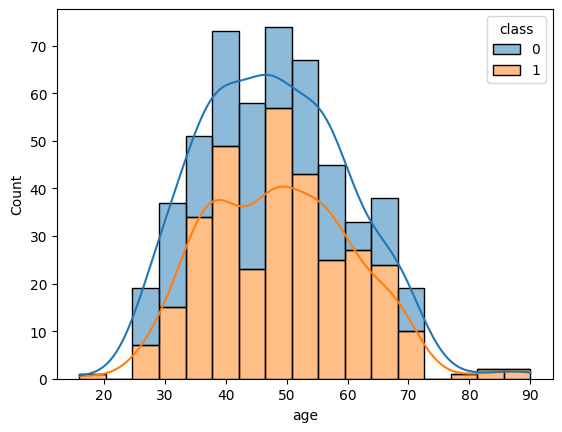

In [ ]:
sns.histplot(data=df, x="age", hue="class", multiple="stack",kde=True)

# Logistic Regression

In [ ]:
# X_train = X_train.to_numpy()

# Logistic Regression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train.values)

lr_test_score = classifier_lr.score(X_test, y_test)


## Five Fold Cross Validation

In [ ]:
kfold = KFold(n_splits=5)
scores = cross_val_score(classifier_lr, X_train, y_train, cv=kfold)
print(scores.mean())

0.9111302352266207


## Test accuracy

In [ ]:
lr_test_score = classifier_lr.score(X_test, y_test)
lr_test_score*100

95.1923076923077

## f1_score

In [ ]:
y_pred_logistic = classifier_lr.predict(X_test)
f1_score(y_test,y_pred_logistic)

0.9612403100775193

## Recall

In [ ]:
recall_score(y_test,y_pred_logistic)

0.96875

In [ ]:
print(classifier_lr.predict(X_test))
type(y_test)

[1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1]


pandas.core.series.Series

#Neural Network

##Necessary libraries for neural network


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets

## Dataset Preparation

In [ ]:
class ddata(Dataset):
 
  def __init__(self,file_name):
    df=pd.read_csv(file_name,sep=';')
    df['gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
    x=df.iloc[:,0:16].values
    y=df.iloc[:,-1].values
 
    self.x_train=torch.tensor(x,dtype=torch.float32)
    self.y_train=torch.LongTensor(y)
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

In [ ]:
dataset = ddata(file_name = '/content/drive/MyDrive/major_project/diabetes_data.csv')
train_set,test_set= torch.utils.data.random_split(dataset,[400,120])
train_loader = DataLoader(dataset = train_set, batch_size = 30,shuffle = True)
test_loader = DataLoader(dataset = test_set, batch_size = 10,shuffle = True)

In [ ]:
print(train_set[0])

(tensor([45.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.]), tensor(1))


##Neural network making

In [ ]:
class diabetese_classifier(nn.Module):
  def __init__(self,input_size , num_classes):
    super(diabetese_classifier,self).__init__()
    self.fc1 = nn.Linear(input_size,32)
    self.fc2 = nn.Linear(32,16)
    self.fc3 = nn.Linear(16,8)
    self.fc4 = nn.Linear(8,num_classes)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    x = F.sigmoid(self.fc2(x))
    x = F.sigmoid(self.fc3(x))
    out = F.sigmoid(self.fc4(x))
    return out

device = 'cpu'

input_size = 16
num_classes = 2
learning_rate = 0.01
batch_size = 60
num_epochs = 5


In [ ]:
model = diabetese_classifier(input_size=input_size,num_classes=num_classes).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)

## train model

In [ ]:
losse = []
for epoch in range(100):
  for index ,(data,targets) in enumerate(train_loader):
    data = data.to(device=device)
    targets = targets.to(device=device)

    scores = model(data)
    loss = criterion(scores,targets)
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
  losse.append(loss.item())
  

Text(0, 0.5, 'Loss')

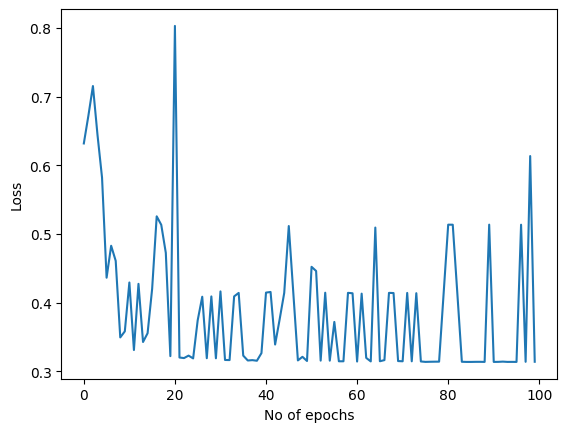

In [ ]:
plt.plot(losse)
plt.xlabel("No of epochs")
plt.ylabel("Loss")

## Testing the neural net


In [ ]:
def check_accuracy(loader,model):
  num_correct = 0
  num_samples = 0
  y_pred =[]
  y_test = []
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      x=x.to(device=device)
      y=y.to(device=device)
      y_test.append(list(y.numpy()))
      scores = model(x)
      #la = nn.Softmax(dim=1)
      # print(la(scores))
      _,predictions = scores.max(1)
      # print(predictions)
      y_pred.append(list(predictions.numpy()))
      num_correct += (predictions == y).sum()
      num_samples += predictions.size(0)

    print(f'Got{num_correct}/{num_samples} with accuracy {float(num_correct)/float(num_samples)*100}')
    return list(np.concatenate(y_pred).flat),list(np.concatenate(y_test).flat)
y_pred_nn,y_test_nn = check_accuracy(test_loader,model)
y_pred_tr=check_accuracy(train_loader,model)

Got117/120 with accuracy 97.5
Got383/400 with accuracy 95.75


### F1-score

In [ ]:
f1_score(y_test_nn,y_pred_nn)

0.9798657718120806

### recall score

In [ ]:
recall_score(y_test_nn,y_pred_nn)

0.9864864864864865

#SVM

##Train model

In [ ]:
svm_classifier = SVC(C=0.5)
svm_classifier.fit(X_train,y_train)

SVC(C=0.5)

## Five fold cross_validation

In [ ]:
kfold = KFold(n_splits=5)
scores = cross_val_score(svm_classifier, X_train, y_train, cv=kfold)
print(scores.mean()*100)

93.51118760757315


## Test accuracy

In [ ]:
svm_score = svm_classifier.score(X_test, y_test)
svm_score

0.9903846153846154

## F1 score

In [ ]:
y_pred_svc = svm_classifier.predict(X_test)
f1_score(y_test,y_pred_svc)

0.9922480620155039

##Recall Score

In [ ]:
recall_score(y_test,y_pred_svc)

1.0

#Decision Tree classifier

## Train Model

In [ ]:
decision_tree_Classifier = DTC()
decision_tree_Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

## Five fold cross_validation

In [ ]:
kfold = KFold(n_splits=5)
scores = cross_val_score(decision_tree_Classifier, X_train, y_train, cv=kfold)
print(scores.mean()*100)

96.15605278255882


## Test accuracy

In [ ]:
decision_tree_score = decision_tree_Classifier.score(X_test, y_test)
decision_tree_score*100

97.11538461538461

## F1 Score

In [ ]:
y_pred_DTC = decision_tree_Classifier.predict(X_test)
f1_score(y_test,y_pred_DTC)

0.9763779527559054

## Recall Score

In [ ]:
recall_score(y_test,y_pred_DTC)

0.96875

#Random Forest Classifier

## Train Model

In [ ]:
Random_forest_classifier = RandomForestClassifier()
Random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

## Five fold cross_validation

In [ ]:
kfold = KFold(n_splits=5)
scores = cross_val_score(Random_forest_classifier, X_train, y_train, cv=kfold)
print(scores.mean()*100)

96.88181296615032


## Test accuracy

In [ ]:
Random_forest_score = Random_forest_classifier.score(X_test, y_test)
Random_forest_score*100

99.03846153846155

## F1 Score

In [ ]:
y_pred_RFC = Random_forest_classifier.predict(X_test)
f1_score(y_test,y_pred_RFC)

0.9921259842519685

## Recall Score

In [ ]:
recall_score(y_test,y_pred_RFC)

0.984375

#Bernoulli Naive bayes

## Train Model

In [ ]:
Naivebayes_classifier = BernoulliNB()
Naivebayes_classifier.fit(X_train,y_train)

BernoulliNB()

## Five fold cross_validation

In [ ]:
kfold = KFold(n_splits=5)
scores = cross_val_score(Naivebayes_classifier, X_train, y_train, cv=kfold)
print(scores.mean()*100)

86.53757888697648


## Test accuracy

In [ ]:
Naivebayes_score = Naivebayes_classifier.score(X_test, y_test)
Naivebayes_score*100

90.38461538461539

## F1 Score

## Recall Score

In [ ]:
y_pred_NB = Naivebayes_classifier.predict(X_test)
f1_score(y_test,y_pred_NB)

0.921875

In [ ]:
recall_score(y_test,y_pred_NB)

0.921875